# Outline
    Will be fixed later

### Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.

### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

- Limit Balance: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- Sex: Gender (1 = male; 2 = female).
- Education: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- Mariage: Marital status (1 = married; 2 = single; 3 = others).
- Age: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005;
- X7 = the repayment status in August, 2005; . . .;
- X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). 
- X12 = amount of bill statement in September, 2005; 
- X13 = amount of bill statement in August, 2005; . . .; 
- X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar). 
- X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;
- X23 = amount paid in April, 2005.

## Import Libaries

In [658]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [659]:
df = pd.read_excel('default-of-credit-card-clients.xls', skiprows= 1)

In [660]:
# a copy of original dataset
df_copy = df.copy()

In [661]:
df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0


In [662]:
df.info() 

# there is no missing value
# all variables are integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## Data Preparation and Cleaning

In [663]:
# i will remove the id 
del df['ID']

In [664]:
# rename the default payment next month 
df.rename(columns = {'default payment next month':'default_payment'}, inplace = True)

In [665]:
# rename the pay_0 to pay_1
df.rename(columns = {'PAY_0':'PAY_1'}, inplace = True)

In [666]:
# convert columns name  to lowercase
df.columns = df.columns.str.lower()

In [667]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment'],
      dtype='object')

### Mapping on Categorilca Varieables

#### Categorical Variables 

- Sex: (1 = male; 2 = female).
- Education: (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- Marial status: (1 = married; 2 = single; 3 = others).

In [668]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment'],
      dtype='object')

##### For sex

In [733]:
df.sex.value_counts() 
# there is no problem. 
# there are two types as know

female    18112
male      11888
Name: sex, dtype: int64

In [734]:
sex_values = {
    1: 'male',
    2: 'female'
}

df.sex = df.sex.map(sex_values)

##### For education

In [735]:
df.education.value_counts() 
# there is a problem. 
# there are 7 types but we just know about 4 types
# Education: (1 = graduate school; 2 = university; 3 = high school; 4 = others).

# so i will change 0, 5 and 6 to 4(other)

university         14030
graduate school    10585
high school         4917
other                468
Name: education, dtype: int64

In [736]:
df['education'] =  df['education'].replace([0, 5, 6], 4)
# now there are just 4 types

In [737]:
education_values = {
    1: 'graduate school',
    2: 'university',
    3: 'high school',
    4: 'other'
}

df.education = df.education.map(education_values)

##### For marriage

In [738]:
df.marriage.value_counts() 
# there is a problem. 
# there are 4 types but we just know about 3 types
# Marial status: (1 = married; 2 = single; 3 = others).

# so i will change 0 to 3(other)

single     15964
married    13659
other        377
Name: marriage, dtype: int64

In [675]:
df['marriage'] =  df['marriage'].replace(0, 3)

In [676]:
marriage_values = {
    1: 'married',
    2: 'single',
    3: 'other'
}

df.marriage = df.marriage.map(marriage_values)

In [677]:
#df['pay_1'] = df['pay_1'].astype(str) 
#df['pay_2'] = df['pay_2'].astype(str) 
#df['pay_3'] = df['pay_3'].astype(str) 
#df['pay_4'] = df['pay_4'].astype(str)  
#df['pay_5'] = df['pay_5'].astype(str) 
#df['pay_6'] = df['pay_6'].astype(str) 

In [678]:
df.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment
0,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,female,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [679]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   limit_bal        30000 non-null  int64 
 1   sex              30000 non-null  object
 2   education        30000 non-null  object
 3   marriage         30000 non-null  object
 4   age              30000 non-null  int64 
 5   pay_1            30000 non-null  int64 
 6   pay_2            30000 non-null  int64 
 7   pay_3            30000 non-null  int64 
 8   pay_4            30000 non-null  int64 
 9   pay_5            30000 non-null  int64 
 10  pay_6            30000 non-null  int64 
 11  bill_amt1        30000 non-null  int64 
 12  bill_amt2        30000 non-null  int64 
 13  bill_amt3        30000 non-null  int64 
 14  bill_amt4        30000 non-null  int64 
 15  bill_amt5        30000 non-null  int64 
 16  bill_amt6        30000 non-null  int64 
 17  pay_amt1         30000 non-null

## EDA

### Data Preprocessing

In [621]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment'],
      dtype='object')

In [686]:
pay_amt = ['pay_amt1','pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

In [687]:
df[pay_amt].describe().round(1)

# there is an anamolly in pay_amt2
# pay_amt2 max value is very big.

,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,5663.6,5921.2,5225.7,4826.1,4799.4,5215.5
std,16563.3,23040.9,17607.0,15666.2,15278.3,17777.5
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,1000.0,833.0,390.0,296.0,252.5,117.8
50%,2100.0,2009.0,1800.0,1500.0,1500.0,1500.0
75%,5006.0,5000.0,4505.0,4013.2,4031.5,4000.0
max,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0


In [681]:
bill_amt =['bill_amt1', 'bill_amt2','bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']

In [683]:
df[bill_amt].describe().round(1)

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,51223.3,49179.1,47013.2,43262.9,40311.4,38871.8
std,73635.9,71173.8,69349.4,64332.9,60797.2,59554.1
min,-165580.0,-69777.0,-157264.0,-170000.0,-81334.0,-339603.0
25%,3558.8,2984.8,2666.2,2326.8,1763.0,1256.0
50%,22381.5,21200.0,20088.5,19052.0,18104.5,17071.0
75%,67091.0,64006.2,60164.8,54506.0,50190.5,49198.2
max,964511.0,983931.0,1664089.0,891586.0,927171.0,961664.0


#### Vale Ranges

In [748]:
cVar =  ['limit_bal','age','bill_amt1','pay_amt2'] # continuous var

In [751]:
df[cVar].describe().round(1)

,limit_bal,age,bill_amt1,pay_amt2
count,30000.0,30000.0,30000.0,30000.0
mean,167484.3,35.5,51223.3,5921.2
std,129747.7,9.2,73635.9,23040.9
min,10000.0,21.0,-165580.0,0.0
25%,50000.0,28.0,3558.8,833.0
50%,140000.0,34.0,22381.5,2009.0
75%,240000.0,41.0,67091.0,5000.0
max,1000000.0,79.0,964511.0,1684259.0


In [752]:
print('It is seen that there are different value ranges.')
print(df.limit_bal.min(), df.limit_bal.max())
print(df.age.min(), df.age.max())
print(df.bill_amt1.min(), df.bill_amt1.max())
print(df.pay_amt2.min(), df.pay_amt2.max())

It is seen that there are different value ranges.
10000 1000000
21 79
-165580 964511
0 1684259


### Data Visualization

#### Histogram

##### Amount of previous payment 

In [715]:
df['pay_amt1'].value_counts().head()

0       5249
2000    1363
3000     891
5000     698
1500     507
Name: pay_amt1, dtype: int64

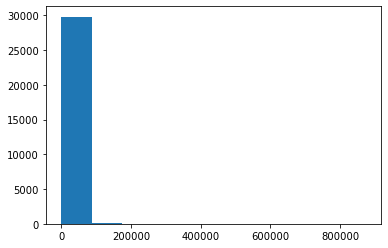

In [706]:
# Linear scale
plt.hist('pay_amt1', data =df)

plt.show()

# we could not get a meaningful plot

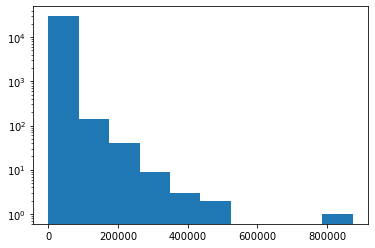

In [708]:
# Log scale
plt.hist('pay_amt1', log = True, data =df)

plt.show()

# right skewed

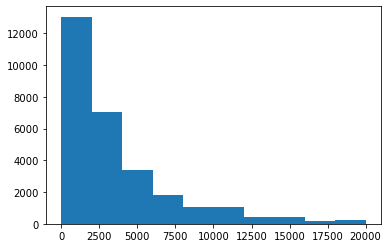

In [704]:
# Linear scale
plt.hist('pay_amt1', data =df,range = [0, 20000])

plt.show()

# between 0 -20k range there is a right skewed data.

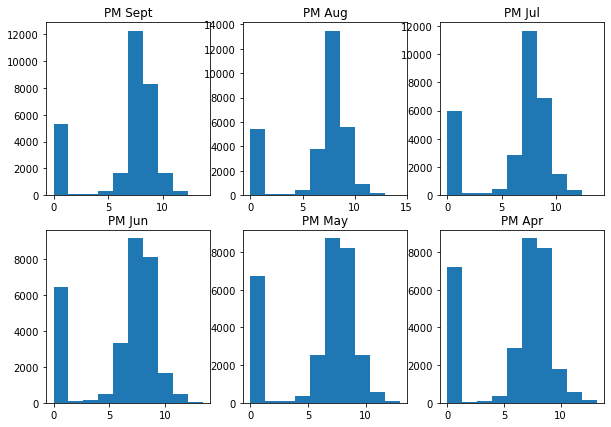

In [709]:
# we can see the distribution of pay amounts with log values

figure, axis = plt.subplots(2, 3, figsize=(10, 7))
figure = figsize=(3, 3)
  
# For Sine Function
axis[0, 0].hist(np.log1p(df['pay_amt1']))
axis[0, 0].set_title("PM Sept")
  
# For Cosine Function
axis[0, 1].hist(np.log1p(df['pay_amt2']))
axis[0, 1].set_title("PM Aug")

# For Cosine Function
axis[0, 2].hist(np.log1p(df['pay_amt3']))
axis[0, 2].set_title("PM Jul")
  
# For Tangent Function
axis[1, 0].hist(np.log1p(df['pay_amt4']))
axis[1, 0].set_title("PM Jun")
  
# For Tanh Function
axis[1, 1].hist(np.log1p(df['pay_amt5']))
axis[1, 1].set_title("PM May")

# For Tanh Function
axis[1, 2].hist(np.log1p(df['pay_amt6']))
axis[1, 2].set_title("PM Apr")
  
# Combine all the operations and display
plt.show()

##### Amount of bill statement 

In [714]:
df['bill_amt1'].value_counts().head()

0      2008
390     244
780      76
326      72
316      63
Name: bill_amt1, dtype: int64

In [716]:
df['bill_amt1'].describe()

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: bill_amt1, dtype: float64

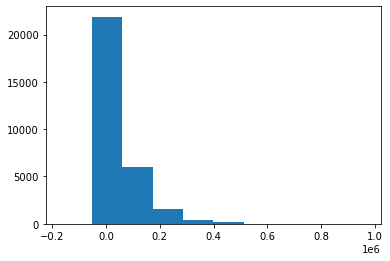

In [717]:
# Linear scale
plt.hist('bill_amt1', data =df)

plt.show()

# we could not get a meaningful plot

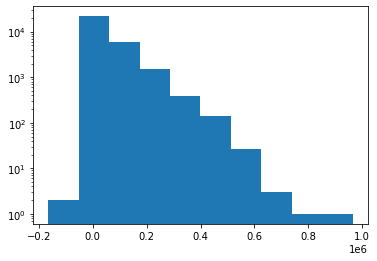

In [718]:
# Log scale
plt.hist('bill_amt1', log = True, data =df)

plt.show()

# right skewed

In [721]:
df['bill_amt1'].tail()

29995    188948
29996      1683
29997      3565
29998     -1645
29999     47929
Name: bill_amt1, dtype: int64

#### Box plot

##### Amount of previous payment 

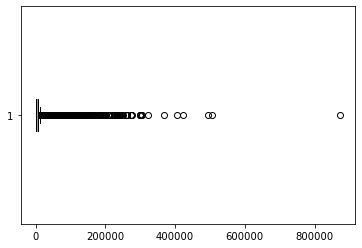

In [560]:
# Lienar scale
plt.boxplot('pay_amt1', vert=False, data =df)

plt.show()

# there is a lot of outlier

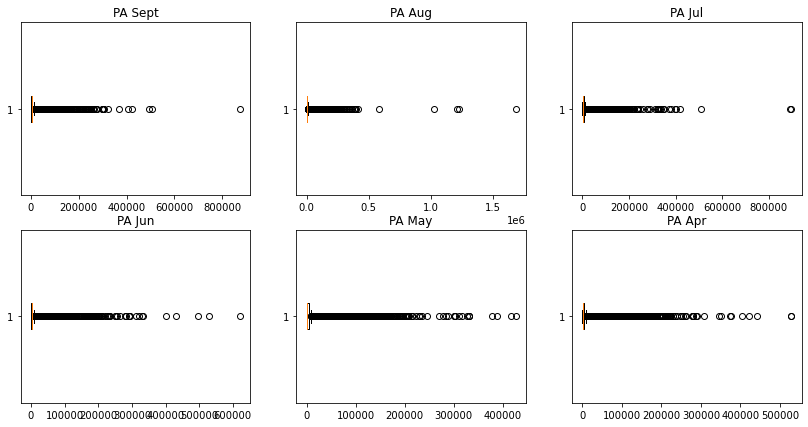

In [731]:
# we can see the outliers of pay amounts

figure, axis = plt.subplots(2, 3, figsize=(14, 7))

axis[0, 0].boxplot('pay_amt1', vert=False, data =df)
axis[0, 0].set_title("PA Sept")
  
axis[0, 1].boxplot('pay_amt2', vert=False, data =df)
axis[0, 1].set_title("PA Aug")

axis[0, 2].boxplot('pay_amt3', vert=False, data =df)
axis[0, 2].set_title("PA Jul")
  
axis[1, 0].boxplot('pay_amt4', vert=False, data =df)
axis[1, 0].set_title("PA Jun")
  
axis[1, 1].boxplot('pay_amt5', vert=False, data =df)
axis[1, 1].set_title("PA May")

axis[1, 2].boxplot('pay_amt6', vert=False, data =df)
axis[1, 2].set_title("PA Apr")
  
# Combine all the operations and display
plt.show()

##### Amount of bill statement 

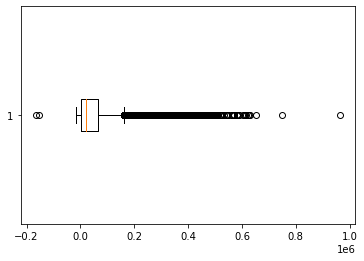

In [729]:
# Lienar scale
plt.boxplot('bill_amt1', vert=False, data =df)

plt.show()

# there is a lot of outlier

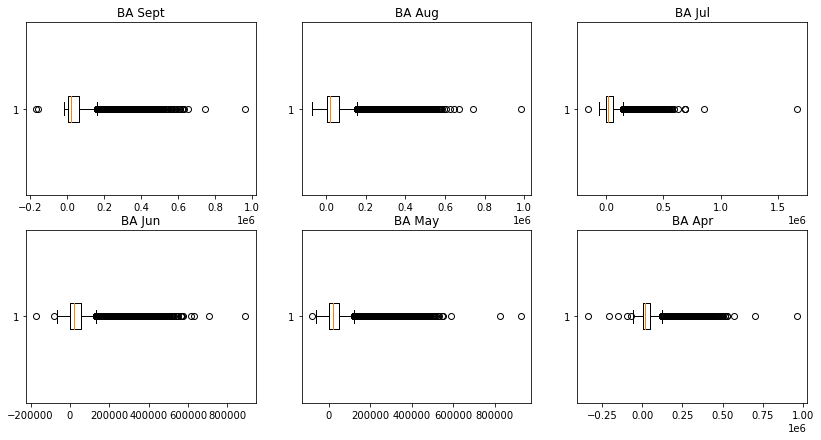

In [732]:
# we can see the outliers of pay amounts

figure, axis = plt.subplots(2, 3, figsize=(14, 7))

axis[0, 0].boxplot('bill_amt1', vert=False, data =df)
axis[0, 0].set_title("BA Sept")
  
axis[0, 1].boxplot('bill_amt2', vert=False, data =df)
axis[0, 1].set_title("BA Aug")

axis[0, 2].boxplot('bill_amt3', vert=False, data =df)
axis[0, 2].set_title("BA Jul")
  
axis[1, 0].boxplot('bill_amt4', vert=False, data =df)
axis[1, 0].set_title("BA Jun")
  
axis[1, 1].boxplot('bill_amt5', vert=False, data =df)
axis[1, 1].set_title("BA May")

axis[1, 2].boxplot('bill_amt6', vert=False, data =df)
axis[1, 2].set_title("BA Apr")
  
# Combine all the operations and display
plt.show()

#### Count plot

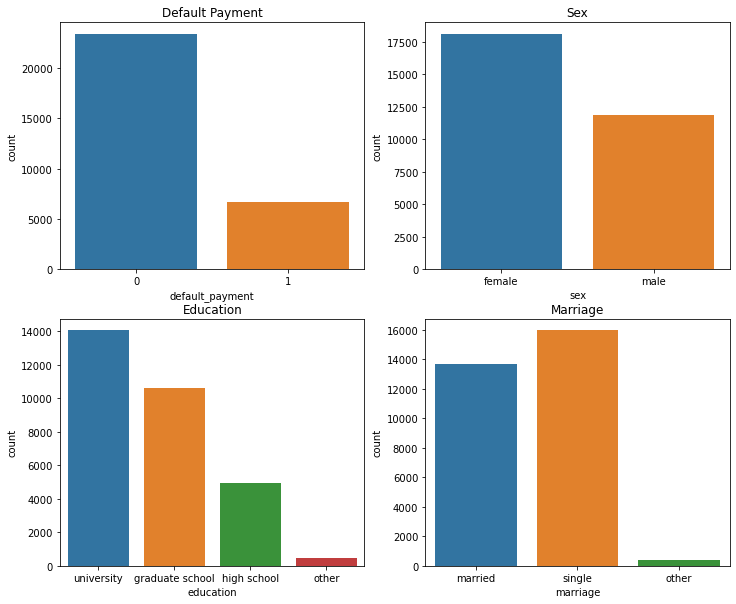

In [563]:
# we can see the outliers of pay amounts

figure, axis = plt.subplots(2, 2, figsize=(12,10 ))
  
sns.countplot(ax=axis[0,0], x=df['default_payment'])
axis[0,0].set_title('Default Payment')

# For Cosine Function
sns.countplot(ax=axis[0,1], x=df['sex'])
axis[0, 1].set_title("Sex")


sns.countplot(ax=axis[1,0], x=df['education'])
axis[1, 0].set_title("Education")
  
# For Tanh Function
sns.countplot(ax=axis[1,1], x=df['marriage'])
axis[1, 1].set_title("Marriage")


# Combine all the operations and display
plt.show()

## Split the Data

In [633]:
# split data train - valid - test ==> %60 - %20 - %20

In [634]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state= 53)

In [635]:
df_train, df_val = train_test_split(df_full_train, test_size= 0.25, random_state=53)

In [636]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [637]:
df_train.shape, df_val.shape, df_test.shape
# splitting is succesful

((18000, 24), (6000, 24), (6000, 24))

### Create y

In [638]:
y_full_train = df_full_train.default_payment.values
y_train = df_train.default_payment.values
y_val = df_val.default_payment.values
y_test = df_test.default_payment.values

In [639]:
del df_full_train['default_payment']
del df_train['default_payment']
del df_val['default_payment']
del df_test['default_payment']


### Dict Vectorizer

In [640]:
full_train_dicts = df_full_train.to_dict(orient='records')
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

In [641]:
dt = DictVectorizer(sparse=False)

#### Create X

In [642]:
X_full_train =  dt.fit_transform(full_train_dicts)
X_train = dt.transform(train_dicts)
X_val = dt.transform(val_dicts)
X_test = dt.transform(test_dicts)

In [643]:
dt.get_feature_names()

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['age',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'education=graduate school',
 'education=high school',
 'education=other',
 'education=university',
 'limit_bal',
 'marriage=married',
 'marriage=other',
 'marriage=single',
 'pay_1',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'sex=female',
 'sex=male']

## Logistic Regression

In [644]:
model = LogisticRegression()

In [645]:
model.fit(X_train, y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [647]:
model.score(X_val, y_val)

0.8115

In [648]:
model.score(X_test, y_test)

0.8088333333333333

In [649]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [650]:
accuracy_score(y_test, y_pred)

0.8088333333333333

In [654]:
model = LogisticRegression()

In [655]:
model.fit(X_full_train, y_full_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [656]:
model.score(X_test, y_test)

0.8085